In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loads the California housing Dataset
housing = fetch_openml(name="house_prices", as_frame=True)  # noqa

In [4]:
data = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
ordinal_cols = ['LotShape', 'Utilities', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallQual']
discret_cols = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold', 'Fireplaces']
continuous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 
target_cols = ['target']
nominal_cols = data.columns.difference(ordinal_cols+discret_cols+continuous_cols+target_cols+['Id'])

In [26]:
print(len(ordinal_cols))
print(len(discret_cols))
print(len(continuous_cols))
print(len(nominal_cols))

23
14
19
23


Distribution des prix

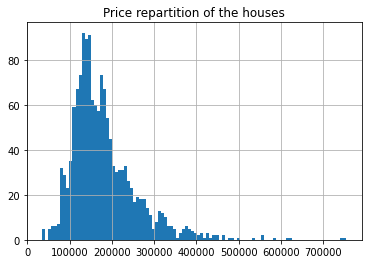

In [7]:
data.target.hist(bins=100)
plt.title('Price repartition of the houses')
plt.show()

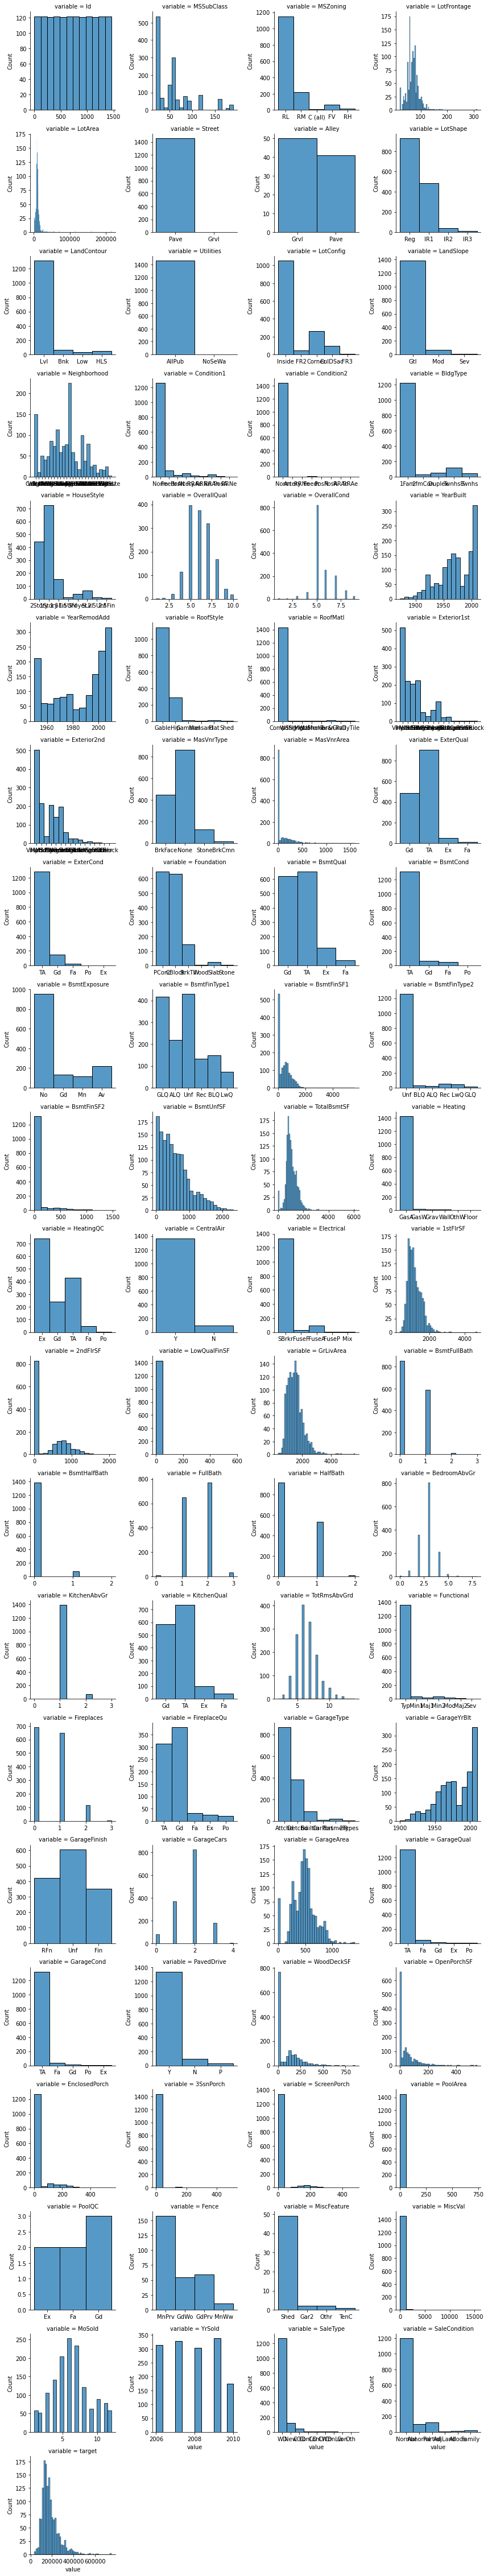

In [8]:
# Grid of distribution plots of all numerical features
f = pd.melt(data)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')

On observe que pour certaines variables, des valeurs sont surreprésentées, ou qu'il y a beaucoup de valeurs manquantes. 

In [9]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [10]:
data.SaleCondition[data.SaleCondition == data.SaleCondition.mode().values[0]].count()/data.SaleCondition.shape[0]*100

82.05479452054794

In [11]:
sparsity = pd.DataFrame()

In [12]:
sparsity['Value'] = data.apply(lambda column: column.mode().values[0])
sparsity['Percentage of value'] = data.apply(lambda column: round(column[column == column.mode().values[0]].count()/column.shape[0]*100,2))
sparsity.sort_values(by="Percentage of value", ascending=False)

,Value,Percentage of value
Utilities,AllPub,99.93
Street,Pave,99.59
PoolArea,0.0,99.52
Condition2,Norm,98.97
3SsnPorch,0.0,98.36
LowQualFinSF,0.0,98.22
RoofMatl,CompShg,98.22
Heating,GasA,97.81
MiscVal,0.0,96.44
KitchenAbvGr,1.0,95.34


On remplace les valeurs ordinales par des chiffres représentant la hiérarchie entre ces valeurs.

In [13]:
# Lot Shape
data.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
data.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
data.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
data.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
data.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
data.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
data.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
data.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
data.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
data.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
data.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
data.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
data.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
data.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
data.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
data.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
data.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
data.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
data.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
data.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Electrical
data.Electrical.replace({'Mix': 1, 'FuseP': 2, 'FuseF':3, 'FuseA': 4, 'SBrkr':5}, inplace=True)

# Fence
data.Fence.replace({'NA': 1, 'MnWw':2, 'GdWo': 3, 'MnPrv': 4, 'GdPrv': 5}, inplace=True)


In [14]:
data[ordinal_cols].sample(20)

,LotShape,Utilities,LandSlope,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,OverallQual
1249,1,4,3,7.0,3,3,3.0,3.0,1.0,4.0,3.0,3,5.0,3,8,NaN,1.0,3.0,3.0,3,NaN,NaN,5.0
1069,1,4,3,7.0,3,3,3.0,3.0,1.0,5.0,1.0,3,5.0,4,8,NaN,1.0,3.0,3.0,3,NaN,NaN,5.0
296,1,4,3,5.0,3,3,3.0,3.0,1.0,4.0,1.0,3,4.0,3,8,NaN,1.0,3.0,3.0,3,NaN,4.0,5.0
261,2,4,3,5.0,4,3,5.0,3.0,1.0,1.0,1.0,5,5.0,5,8,4.0,3.0,3.0,3.0,3,NaN,NaN,8.0
493,1,4,3,6.0,3,3,3.0,3.0,1.0,4.0,2.0,3,4.0,3,8,2.0,1.0,3.0,3.0,3,NaN,NaN,5.0
923,1,4,3,5.0,4,3,4.0,3.0,1.0,2.0,6.0,5,5.0,4,8,2.0,2.0,3.0,3.0,3,NaN,NaN,6.0
104,1,4,3,4.0,3,2,3.0,3.0,1.0,2.0,1.0,5,3.0,3,8,3.0,1.0,3.0,3.0,3,NaN,NaN,7.0
61,1,4,3,7.0,3,3,3.0,2.0,1.0,1.0,1.0,3,5.0,2,8,NaN,1.0,3.0,3.0,1,NaN,NaN,5.0
291,1,4,3,6.0,3,2,3.0,2.0,1.0,3.0,1.0,5,5.0,2,8,NaN,NaN,NaN,NaN,1,NaN,NaN,5.0
692,2,4,2,5.0,4,3,4.0,3.0,4.0,6.0,1.0,5,5.0,4,8,4.0,2.0,3.0,3.0,3,NaN,NaN,7.0


In [15]:
data[continuous_cols] = data[continuous_cols].astype('float64');
data[ordinal_cols] = data[ordinal_cols].astype('float64')
data[discret_cols] = data[discret_cols].astype('float64')
data.target = data.target.astype('float64');

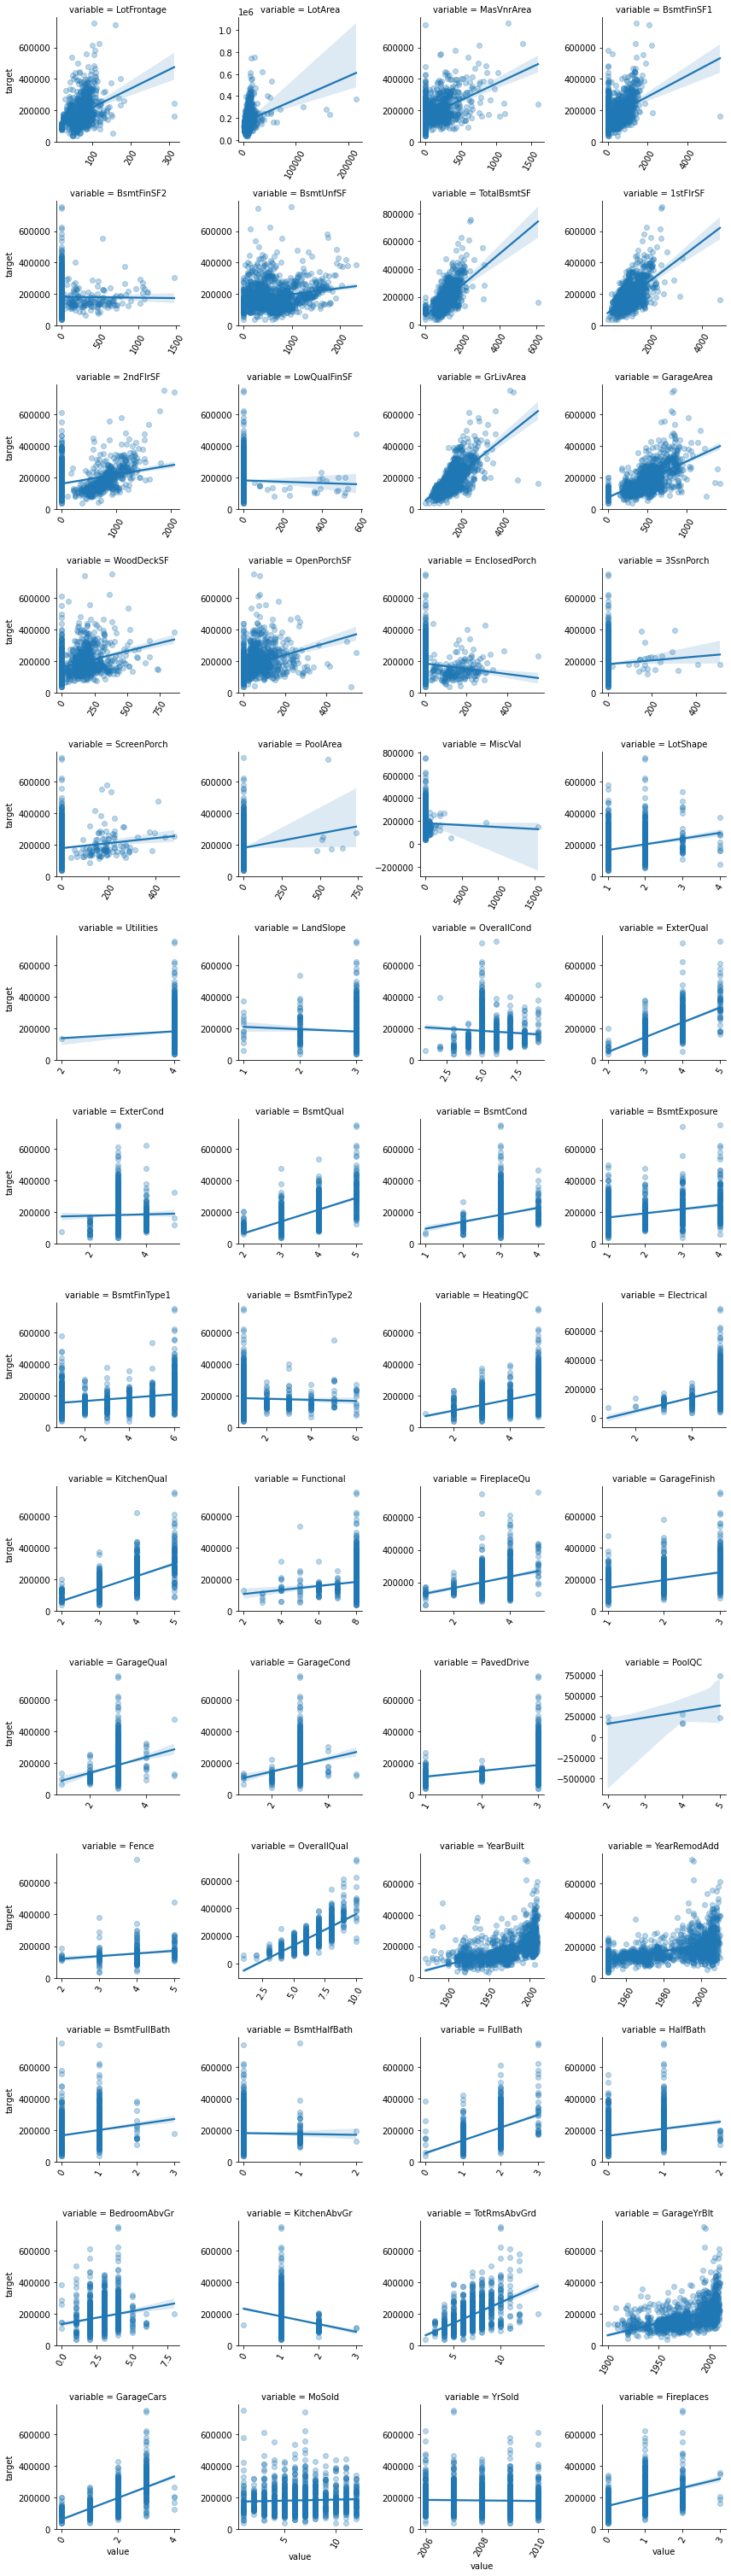

In [16]:
# Scatter plots of features against SalePrice
f = pd.melt(data, id_vars=['target'],value_vars=continuous_cols+ordinal_cols+discret_cols)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'target', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()



In [17]:
len(nominal_cols)

23

<Figure size 1080x288 with 0 Axes>

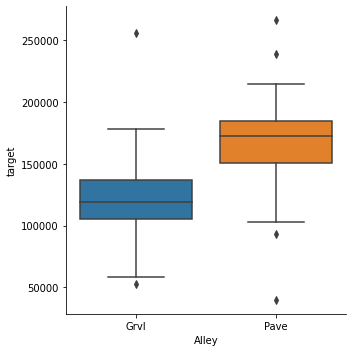

<Figure size 1080x288 with 0 Axes>

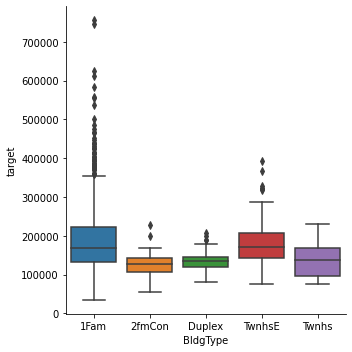

<Figure size 1080x288 with 0 Axes>

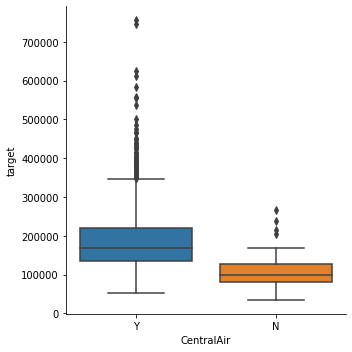

<Figure size 1080x288 with 0 Axes>

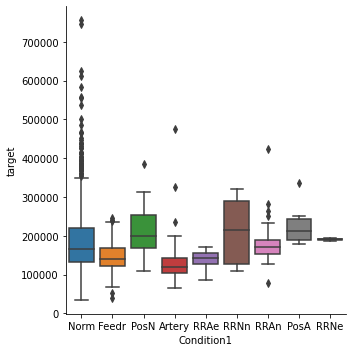

<Figure size 1080x288 with 0 Axes>

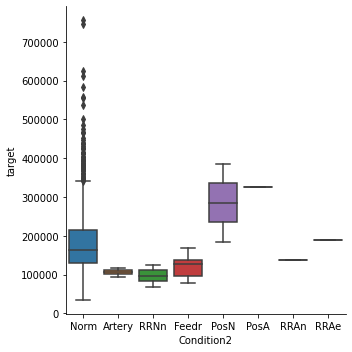

<Figure size 1080x288 with 0 Axes>

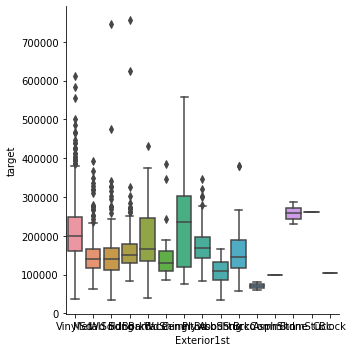

<Figure size 1080x288 with 0 Axes>

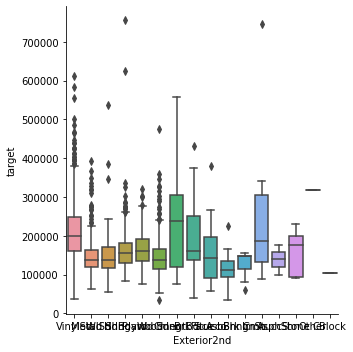

<Figure size 1080x288 with 0 Axes>

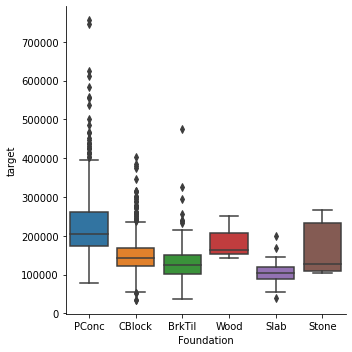

<Figure size 1080x288 with 0 Axes>

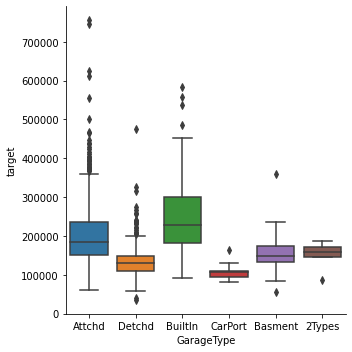

<Figure size 1080x288 with 0 Axes>

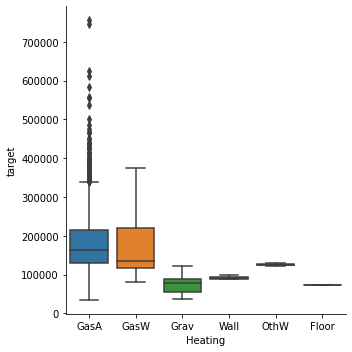

<Figure size 1080x288 with 0 Axes>

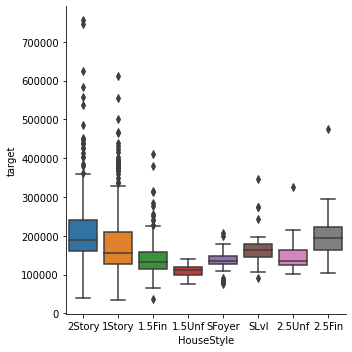

<Figure size 1080x288 with 0 Axes>

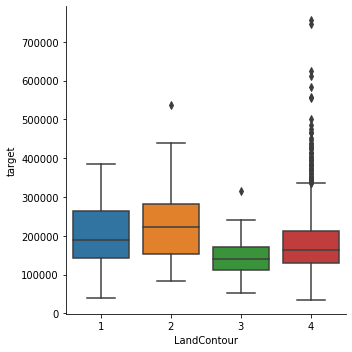

<Figure size 1080x288 with 0 Axes>

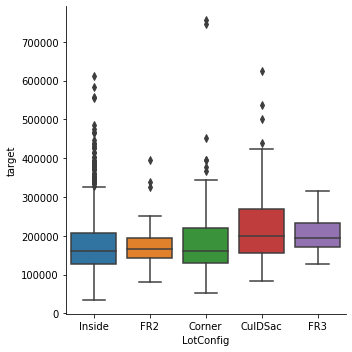

<Figure size 1080x288 with 0 Axes>

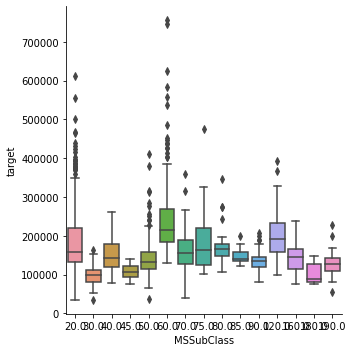

<Figure size 1080x288 with 0 Axes>

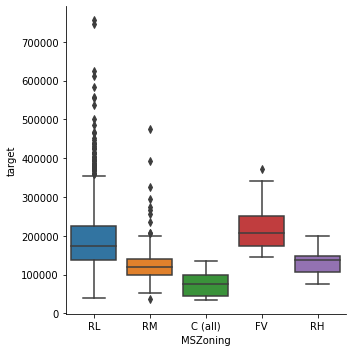

<Figure size 1080x288 with 0 Axes>

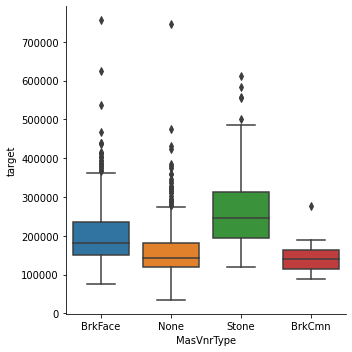

<Figure size 1080x288 with 0 Axes>

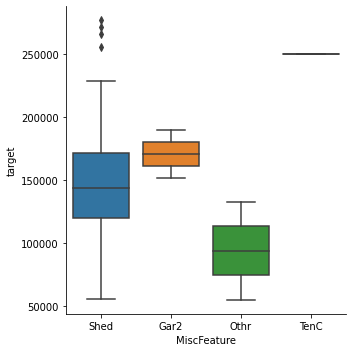

<Figure size 1080x288 with 0 Axes>

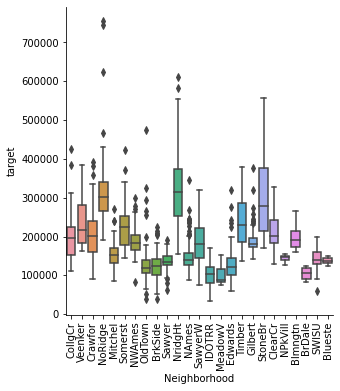

<Figure size 1080x288 with 0 Axes>

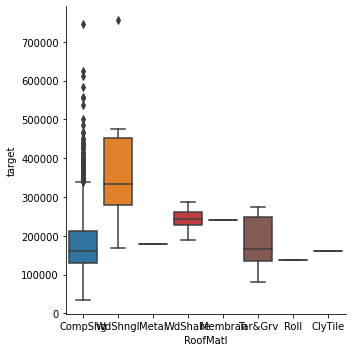

<Figure size 1080x288 with 0 Axes>

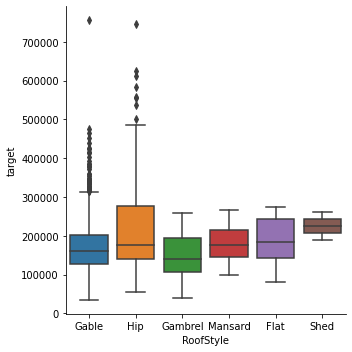

<Figure size 1080x288 with 0 Axes>

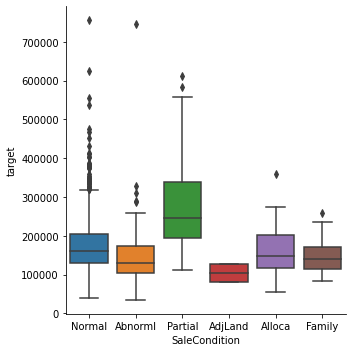

<Figure size 1080x288 with 0 Axes>

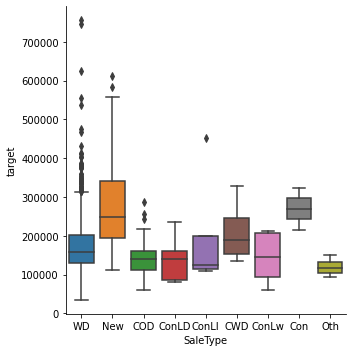

<Figure size 1080x288 with 0 Axes>

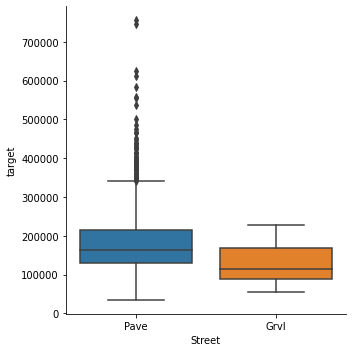

In [22]:
for col in nominal_cols:
    plt.figure(figsize=(15,4));
    sns.catplot(x=col, y="target", kind="box", data=data)
    if col == 'Neighborhood':
        plt.xticks(rotation=90)
    # Display the plot
    plt.show()
    # Close the current plot to stop retaining memory
    plt.close();

In [24]:
listcorr = data.corrwith(data['target']).sort_values(ascending=False).abs().head(50)
print(listcorr)
# [df[quanti].columns.difference(['SalePrice'])]



target          1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.644019
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
GarageFinish    0.513105
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
PoolQC          0.447936
HeatingQC       0.427649
BsmtFinSF1      0.386420
BsmtExposure    0.352958
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
FireplaceQu     0.295794
HalfBath        0.284108
BsmtFinType1    0.277436
LotShape        0.267759
LotArea         0.263843
Electrical      0.233590
PavedDrive      0.231357
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Fence           0.201953
BedroomAbvGr    0.168213
BsmtCond        0.160658
GarageQual      0.156693
GarageCond      0.125013


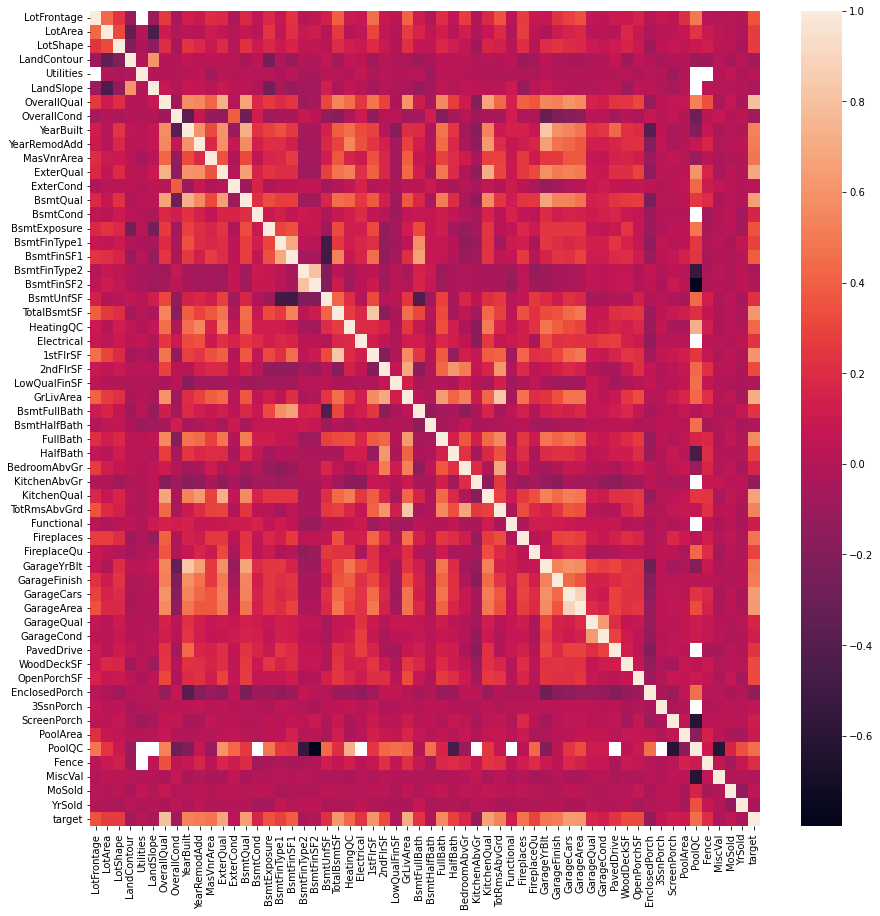

In [25]:


ax=sns.heatmap(data.corr(), xticklabels=True, yticklabels=True)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,15)

